In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from statsmodels.tsa.stattools import adfuller, coint

def stationarity_test(series):
    result = adfuller(series)
    print(f"ADF statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    if result[1] < 0.05:
        print("Stationary at 0.05 significance level")
    else:
        print("Not stationary at 0.05 significance level")

def cointegration_test(series1, series2):
    score, p_value, _ = coint(series1, series2)
    print(f"Engle-Granger test statistic: {score:.3f}")
    print(f"p-value: {p_value:.3f}")
    if p_value < 0.05:
        print("Cointegrated at 0.05 significance level")
    else:
        print("Not cointegrated at 0.05 significance level")

In [ ]:
from math import log, sqrt, exp, erf
from statistics import NormalDist


class BlackScholes:

    # @staticmethod
    # def erf_vec(x):
    #     return np.vectorize(erf)(x)

    @staticmethod
    def normal_cdf(x):
        # return 0.5 * (1 + BlackScholes.erf_vec(x / np.sqrt(2)))
        return NormalDist().cdf(x)
    
    @staticmethod
    def normal_pdf(x):
        return np.exp(-0.5 * x * x) / np.sqrt(2 * np.pi)

    @staticmethod
    def d1(spot, strike, time_to_expiry, volatility):
        return (
            np.log(spot / strike)
            + (0.5 * volatility * volatility) * time_to_expiry
        ) / (volatility * np.sqrt(time_to_expiry))
    
    @staticmethod
    def d2(spot, strike, time_to_expiry, volatility):
        return BlackScholes.d1(spot, strike, time_to_expiry, volatility) - (
            volatility * np.sqrt(time_to_expiry)
        )

    @staticmethod
    def black_scholes_call(spot, strike, time_to_expiry, volatility):
        d1 = BlackScholes.d1(spot, strike, time_to_expiry, volatility)
        d2 = BlackScholes.d2(spot, strike, time_to_expiry, volatility)
        call_price = spot*BlackScholes.normal_cdf(d1) - strike*BlackScholes.normal_cdf(d2)
        return call_price

    @staticmethod
    def black_scholes_put(spot, strike, time_to_expiry, volatility):
        d1 = BlackScholes.d1(spot, strike, time_to_expiry, volatility)
        d2 = BlackScholes.d2(spot, strike, time_to_expiry, volatility)
        put_price = strike*BlackScholes.normal_cdf(-d2) - spot*BlackScholes.normal_cdf(-d1)
        return put_price

    @staticmethod
    def delta(spot, strike, time_to_expiry, volatility):
        d1 = BlackScholes.d1(spot, strike, time_to_expiry, volatility)
        return BlackScholes.normal_cdf(d1)

    @staticmethod
    def gamma(spot, strike, time_to_expiry, volatility):
        d1 = BlackScholes.d1(spot, strike, time_to_expiry, volatility)
        return BlackScholes.normal_pdf(d1) / (spot * volatility * np.sqrt(time_to_expiry))

    @staticmethod
    def vega(spot, strike, time_to_expiry, volatility):
        d1 = BlackScholes.d1(spot, strike, time_to_expiry, volatility)
        # print(f"d1: {d1}")
        # print(f"vol: {volatility}")
        # print(f"spot: {spot}")
        # print(f"strike: {strike}")
        # print(f"time: {time_to_expiry}")
        return BlackScholes.normal_pdf(d1) * (spot * np.sqrt(time_to_expiry)) / 100

    @staticmethod
    def implied_volatility(
        call_price, spot, strike, time_to_expiry, max_iterations=200, tolerance=1e-10
    ):
        low_vol = 0.01
        high_vol = 1.0
        volatility = (low_vol + high_vol) / 2.0  # Initial guess as the midpoint
        for _ in range(max_iterations):
            estimated_price = BlackScholes.black_scholes_call(
                spot, strike, time_to_expiry, volatility
            )
            diff = estimated_price - call_price
            if abs(diff) < tolerance:
                break
            elif diff > 0:
                high_vol = volatility
            else:
                low_vol = volatility
            volatility = (low_vol + high_vol) / 2.0
        return volatility


In [5]:
prices_1 = pd.read_csv('./round-3-island-data-bottle/prices_round_3_day_0.csv', delimiter=';').apply(pd.to_numeric, errors='ignore')
prices_2 = pd.read_csv('./round-3-island-data-bottle/prices_round_3_day_1.csv', delimiter=';').apply(pd.to_numeric, errors='ignore')
prices_3 = pd.read_csv('./round-3-island-data-bottle/prices_round_3_day_2.csv', delimiter=';').apply(pd.to_numeric, errors='ignore')
trades_1 = pd.read_csv('./round-3-island-data-bottle/trades_round_3_day_0.csv', delimiter=';').apply(pd.to_numeric, errors='ignore')
trades_2 = pd.read_csv('./round-3-island-data-bottle/trades_round_3_day_1.csv', delimiter=';').apply(pd.to_numeric, errors='ignore')
trades_3 = pd.read_csv('./round-3-island-data-bottle/trades_round_3_day_2.csv', delimiter=';').apply(pd.to_numeric, errors='ignore')

PRODUCTS = set(prices_1['product'])
PRODUCTS
OPTIONS = [
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500',
    'VOLCANIC_ROCK_VOUCHER_9500',
    'VOLCANIC_ROCK_VOUCHER_9750']
STRIKES = [10000, 10250, 10500, 9500, 9750]

/var/folders/fw/cl62311d3y1_dgsvr1tft4f80000gn/T/ipykernel_83038/4104498848.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  prices_1 = pd.read_csv('./round-3-island-data-bottle/prices_round_3_day_0.csv', delimiter=';').apply(pd.to_numeric, errors='ignore')
/var/folders/fw/cl62311d3y1_dgsvr1tft4f80000gn/T/ipykernel_83038/4104498848.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  prices_2 = pd.read_csv('./round-3-island-data-bottle/prices_round_3_day_1.csv', delimiter=';').apply(pd.to_numeric, errors='ignore')
/var/folders/fw/cl62311d3y1_dgsvr1tft4f80000gn/T/ipykernel_83038/4104498848.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
 

In [37]:
TIME_TO_EXPIRY = np.array([7, 6, 5])/252
for i, df in enumerate([prices_1, prices_2, prices_3]):
    df['bid_volume'] = df['bid_volume_1'].fillna(0) + df['bid_volume_2'].fillna(0) + df['bid_volume_3'].fillna(0)
    df['ask_volume'] = df['ask_volume_1'].fillna(0) + df['ask_volume_2'].fillna(0) + df['ask_volume_3'].fillna(0)
    df['volume_imbalance'] = (df['bid_volume'] - df['ask_volume']) / (df['bid_volume'] + df['ask_volume'])
    df['spread'] = df['ask_price_1'].fillna(0) - df['bid_price_1'].fillna(0)
    df['vwap_bid'] = (df['bid_volume_1'].fillna(0) * df['bid_price_1'].fillna(0) +
                      df['bid_volume_2'].fillna(0) * df['bid_price_2'].fillna(0) +
                      df['bid_volume_3'].fillna(0) * df['bid_price_3'].fillna(0)) / df['bid_volume']
    df['vwap_ask'] = (df['ask_volume_1'].fillna(0) * df['ask_price_1'].fillna(0) +
                      df['ask_volume_2'].fillna(0) * df['ask_price_2'].fillna(0) +
                      df['ask_volume_3'].fillna(0) * df['ask_price_3'].fillna(0)) / df['ask_volume']
    df['vwap'] = (df['bid_volume_1'].fillna(0) * df['bid_price_1'].fillna(0) +
                  df['bid_volume_2'].fillna(0) * df['bid_price_2'].fillna(0) +
                  df['bid_volume_3'].fillna(0) * df['bid_price_3'].fillna(0) +
                  df['ask_volume_1'].fillna(0) * df['ask_price_1'].fillna(0) +
                  df['ask_volume_2'].fillna(0) * df['ask_price_2'].fillna(0) +
                  df['ask_volume_3'].fillna(0) * df['ask_price_3'].fillna(0)) / (df['bid_volume'] + df['ask_volume'])
    for product in PRODUCTS:
        idx = df['product'] == product
        df.loc[idx, 'pct_return'] = df.loc[idx, 'mid_price'].pct_change()
        df.loc[idx, 'log_return'] = np.log(df.loc[idx, 'mid_price']).diff()
        df.loc[idx, 'mean_window3'] = df.loc[idx, 'mid_price'].rolling(3).mean()
        df.loc[idx, 'mean_window5'] = df.loc[idx, 'mid_price'].rolling(5).mean()
        df.loc[idx, 'mean_window10'] = df.loc[idx, 'mid_price'].rolling(10).mean()
        df.loc[idx, 'std_window3'] = df.loc[idx, 'mid_price'].rolling(3).std()
        df.loc[idx, 'std_window5'] = df.loc[idx, 'mid_price'].rolling(5).std()
        df.loc[idx, 'std_window10'] = df.loc[idx, 'mid_price'].rolling(10).std()
        # Here one timestamp is 100/10000 of a day
        df.loc[idx, 'realized_volatility_window3'] = df.loc[idx, 'log_return'].rolling(3).std() * np.sqrt(252*100)
    for option, stike in zip(OPTIONS, STRIKES):
        idx = df['product'] == option
        timestamp = df.loc[idx, 'timestamp'].values
        call_price = df.loc[idx, 'mid_price'].values
        spot_idx = df['product'] == 'VOLCANIC_ROCK'
        spot_price = df.loc[spot_idx, 'mid_price'].values
        spot_timestamp = df.loc[spot_idx, 'timestamp'].values
        assert (timestamp == spot_timestamp).all(), "Timestamps do not match"
        time_to_expiry = TIME_TO_EXPIRY[i]
        vols = np.zeros(len(call_price))
        deltas = np.zeros(len(call_price))
        gammas = np.zeros(len(call_price))
        vegas = np.zeros(len(call_price))
        for j in range(len(call_price)):
            vols[j] = BlackScholes.implied_volatility(
                call_price[j], spot_price[j], stike, time_to_expiry, max_iterations=500, tolerance=1e-8
            )
            deltas[j] = BlackScholes.delta(
                spot_price[j], stike, time_to_expiry, vols[j]
            )
            gammas[j] = BlackScholes.gamma(
                spot_price[j], stike, time_to_expiry, vols[j]
            )
            vegas[j] = BlackScholes.vega(
                spot_price[j], stike, time_to_expiry, vols[j]
            )
        df.loc[idx, 'implied_volatility'] = vols
        df.loc[idx, 'delta'] = deltas
        df.loc[idx, 'gamma'] = gammas
        df.loc[idx, 'vega'] = vegas


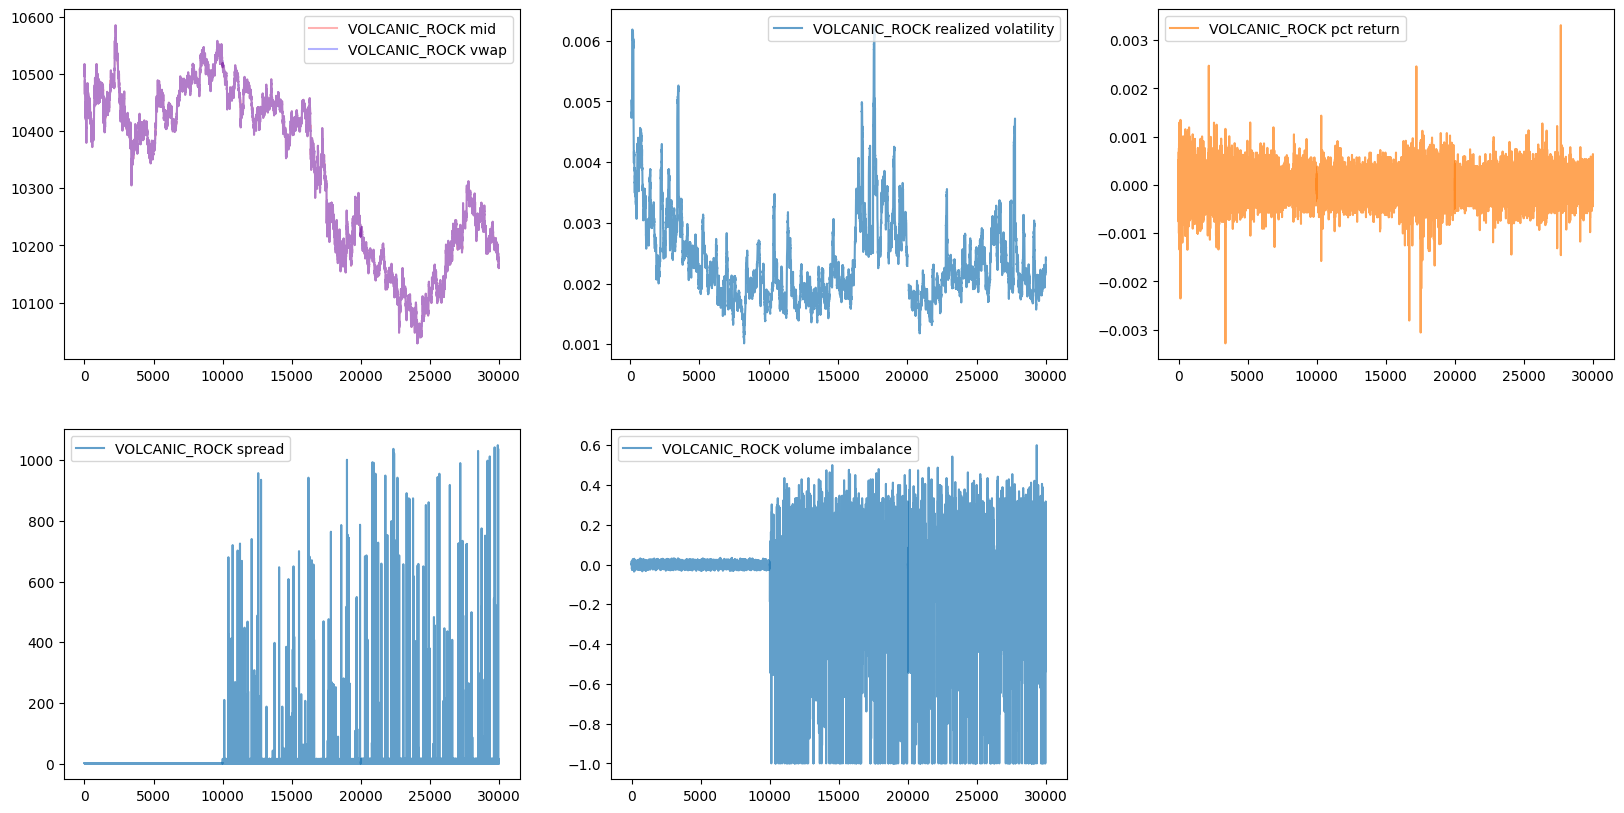

In [38]:
product = 'VOLCANIC_ROCK'
start = 0
plt.figure(figsize=(20, 10))
row, col = 2, 3
for day, df in enumerate([prices_1, prices_2, prices_3]):
    idx = df['product'] == product
    end = start+len(df['timestamp'][idx])-1
    plot_range = range(start, end+1)
    cnt = 1
    plt.subplot(row, col, cnt)
    cnt += 1
    plt.plot(plot_range, df['mid_price'][idx], label=f'{product} mid', alpha=0.3, c='r')
    plt.plot(plot_range, df['vwap'][idx], label=f'{product} vwap', alpha=0.3, c='b')
    # plt.plot(plot_range, df['mean_window3'][idx], label=f'{product} mean_window5', alpha=1, c='k')
    plt.yscale('log') if product == 'RAINFOREST_RESIN' else None
    plt.legend() if day == 0 else None
    plt.subplot(row, col, cnt)
    cnt += 1
    plt.plot(plot_range, df['realized_volatility'][idx], label=f'{product} realized volatility', alpha=0.7, c='C0')
    plt.legend() if day == 0 else None
    plt.subplot(row, col, cnt)
    cnt += 1
    plt.plot(plot_range, df['pct_return'][idx], label=f'{product} pct return', alpha=0.7, c='C1')
    plt.legend() if day == 0 else None
    plt.subplot(row, col, cnt)
    cnt += 1
    plt.plot(plot_range, prices_1['spread'][idx], label=f'{product} spread', alpha=0.7, c='C0')
    plt.legend() if day == 0 else None
    plt.subplot(row, col, cnt)
    cnt += 1
    plt.plot(plot_range, prices_1['volume_imbalance'][idx], label=f'{product} volume imbalance', alpha=0.7, c='C0')
    plt.legend() if day == 0 else None
    start = end + 1

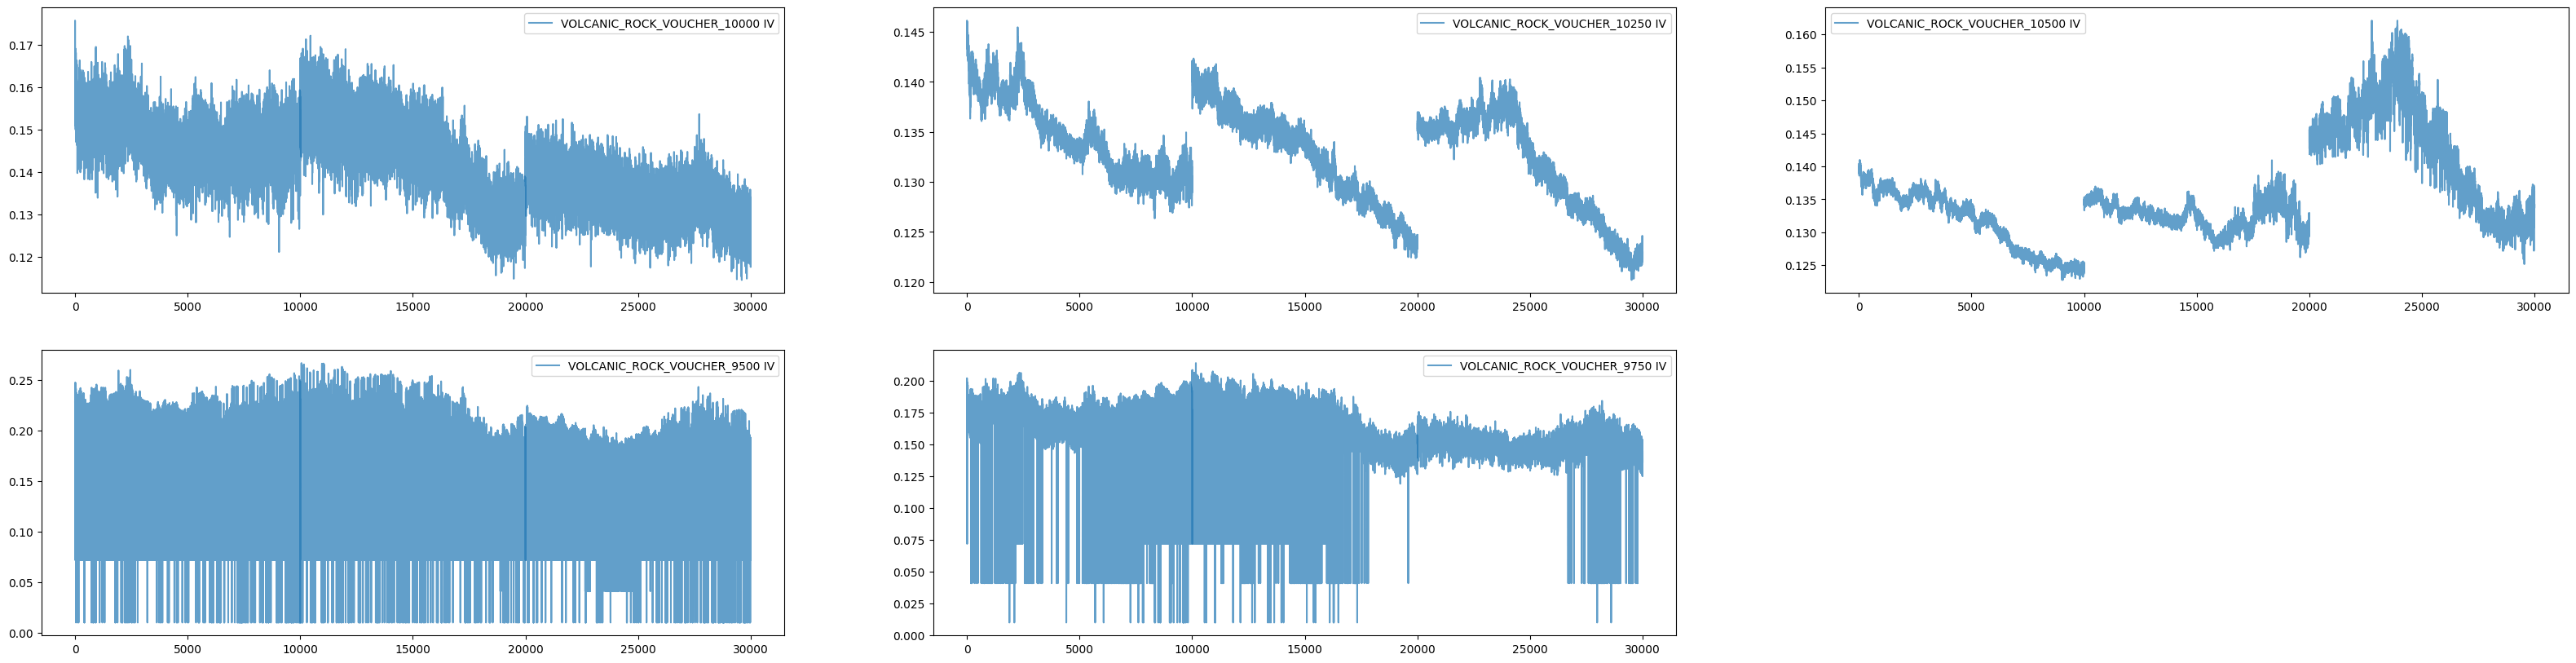

In [39]:
start = 0
plt.figure(figsize=(40, 10))
row, col = 2, 3
for day, df in enumerate([prices_1, prices_2, prices_3]):
    cnt = 1
    for option in OPTIONS:
        # plot iv
        idx = df['product'] == option
        end = start+len(df['timestamp'][idx])-1
        plot_range = range(start, end+1)
        plt.subplot(row, col, cnt)
        cnt += 1
        plt.plot(plot_range, df['implied_volatility'][idx], label=f'{option} IV', alpha=0.7, c='C0')
        plt.legend() if day == 0 else None
    start = end + 1

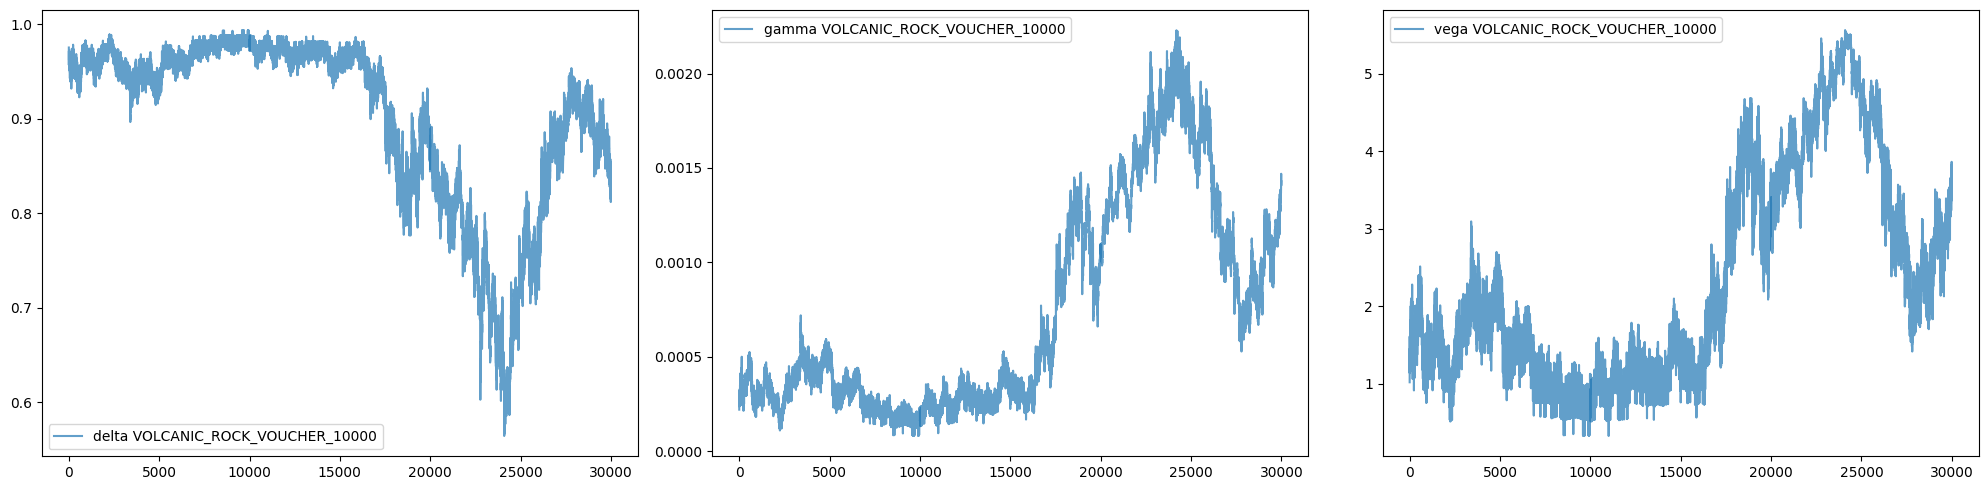

In [41]:
# plot greeks
GREEKS = ['delta', 'gamma', 'vega']
start = 0
plt.figure(figsize=(20, 5))
row, col = 1, 3
for day, df in enumerate([prices_1, prices_2, prices_3]):
    cnt = 1
    for greek in GREEKS:
        # plot iv
        idx = df['product'] == 'VOLCANIC_ROCK_VOUCHER_10000'
        end = start+len(df['timestamp'][idx])-1
        plot_range = range(start, end+1)
        plt.subplot(row, col, cnt)
        cnt += 1
        plt.plot(plot_range, df[greek][idx], label=f'{greek} VOLCANIC_ROCK_VOUCHER_10000', alpha=0.7, c='C0')
        plt.legend() if day == 0 else None
    start = end + 1
plt.tight_layout()
plt.show()